In [ ]:
from func_agent.agent import Agent as FuncAgent 
from workfl_agent.agent import Agent as WorkflAgent

import func_repository.repository as repository

from openai import OpenAI

import logging

logging.basicConfig(level=logging.INFO)


In [ ]:
repo = repository.Repository()
repo.functions

[<function func_repository.descriptions.d_get_coordinates_by_city(city: str)>,
 <function func_repository.descriptions.d_get_current_weather(city: str)>,
 <function func_repository.descriptions.d_send_email_to(recipient: str, content: str, subject: str)>,
 <function func_repository.descriptions.d_write_text(text_content: str, context_info: str) -> str>]

In [ ]:
bagent = WorkflAgent(functions=repo.functions)
#response = agent.ask('What is the weather in Freiburg?')

In [ ]:
bagent.chat_history

[{'role': 'system',
  'content': 'You are modeling a process workflow. You are given a textual description of a process workflow. \nThe aim is to return the workflow description as a directional graph.\nEvery described function from the text is mapped to a node. Keep the context of the function and include rather more information for one task.\nThe graph must be returned in a JSON representation. The key is the source node and the values are the target nodes stored in a list.\nI give you an example.\nI would like to know how warm it is in Berlin. Put the information in an email and send it to Nick Reiter.\n{\n    "get the weather data of Berlin": ["write the email"],\n    "write the email": ["send the email to Nick Reiter"],\n    "send the email to Nick Reiter": []\n}\nOnly provide the clear JSON\nIf the request is not a textual process worklfow description, behave like a normal chatbot!\n'}]

In [ ]:
wagent = WorkflAgent(functions=repo.functions)

query = 'Get the weather data about berlin, write a love poem about the current weather and store the poem in a txt file'
output = wagent.ask(query=query)
#wagent.execute()



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [6]:
wagent.last_response

'{\n    "get the weather data about Berlin": ["write a love poem about the current weather"],\n    "write a love poem about the current weather": ["store the poem in a txt file"],\n    "store the poem in a txt file": []\n}'

In [ ]:
wagent.execute()

INFO:root:Executing workflow:


.

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:START: d_get_current_weather | args: Berlin
INFO:root:END: d_get_current_weather 
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


.

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:START: d_write_text
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:END: d_write_text
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


.

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:START: d_write_text


In [8]:
wagent = WorkflAgent(functions=repo.functions)
wagent.ask('Suche mir das Wetter für Berlin aus und sende die Informationen an nick.reiter@hotmail.de')
#wagent.ask('What is the capital of Germany')
#wagent.show_directed_graph()

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


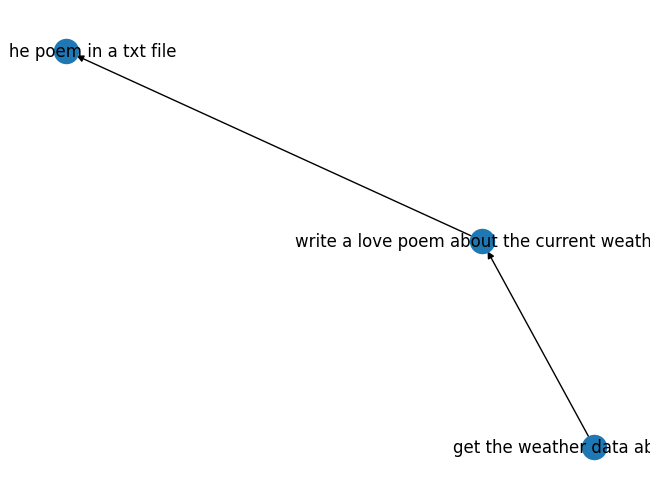

In [7]:
wagent.show_directed_graph()

In [ ]:
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What is the weather in Freiburg?"}]
)

In [ ]:
response.choices[0].message.content

In [ ]:
response.choices[0].finish_reason

In [ ]:
agent.functions

In [ ]:
import inspect
import func_repository.descriptions as desc

ls_func = []    

for name, obj in inspect.getmembers(desc):
    if inspect.isfunction(obj) and name.startswith('d_'): 
        print(obj)
        ls_func.append(obj)



In [ ]:
ls_func

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class DirectedGraph:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_edge(self, start, end):
        self.graph.add_edge(start, end)

    def display(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, arrows=True)
        plt.show()

# Example usage:


In [ ]:
from workfl_agent.agent import Agent as WAgent

In [ ]:
wagent = WAgent()
res = wagent.ask('Can you please help me? Find a cool excel including data about social changes in Germany in the internet. Download it and then read read it again. Then the information should be summarized. Subsequently send to my boss boss@gdata.de. Repeat from the beginning')

In [ ]:
wagent.ask('Tell me a joke about my mom')

In [ ]:
import json
graph_representation = json.loads(res)


graph = DirectedGraph()

for key in graph_representation:
    values = graph_representation[key]
    for value in values:
        graph.add_edge(key, value)

graph.display()

In [ ]:
graph_representation

In [ ]:
import json
type(json.loads(res))

In [ ]:
wagent.show_directed_graph()

In [ ]:
from func_repository.descriptions import d_write_text
from func_repository.descriptions import d_get_current_weather

weather = d_get_current_weather('Berlin')
d_write_text(weather, 'write to my boss')